### Import Libraries and Set Paths

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Define directories
base_dir = '/Users/jetcalz07/Desktop/MIDS/W281_CV/logo_detection_w281/'
image_dir = base_dir + 'data/images/'
bbox_dir = base_dir + 'data/yolofinalset/obj_train_data/'

### Load Data, Split

In [80]:
df = pd.read_pickle(base_dir+'data/feature_sets/feature_set_v110822.csv')
print(f"Num Bboxes: {len(df)}")
df.head(2)

Num Bboxes: 1641


,img_file,bbox_file,label,bbox_num,bbox_corners,simple_feature,harris_orb_feature,orb_kp_feature,harris_sift_feature,sift_kp_feature,cm_hsv_0,cm_hsv_2,cm_hsv_3,cm_rgb_0,cm_rgb_2,cm_rgb_3,cm_ycrcb_0,cm_ycrcb_2,cm_ycrcb_3
0,002837.jpg,002837.txt,1.0,1,"[[1, 762, 932, 347, 403], [1, 185, 279, 250, 2...","[[196.0, 193.0, 195.0, 198.0, 198.0, 130.0, 12...","[[134, 69, 30, 175, 13, 66, 54, 40, 172, 132, ...","[[93, 229, 27, 160, 213, 222, 109, 101, 160, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 3.0, 5.0, 1.0, 27.0, 17.0, 4.0, 1.0, 11...","[76.49485, 162.83781, 199.68802]","[73.71675845905325, 67.9637041561294, 36.54168...","[57.57648613303671, -76.54733687916887, -39.21...","[198.84003, 121.79107, 73.20924]","[37.08143059480818, 61.253716609134244, 44.857...","[-39.48401557006493, -23.93970058436079, 51.63...","[139.3022, 170.47731, 90.70788]","[44.41095040800821, 24.43668525078755, 28.1218...","[16.23894911389937, -16.547448131172395, -11.1..."
1,002837.jpg,002837.txt,1.0,2,"[[1, 762, 932, 347, 403], [1, 185, 279, 250, 2...","[[152.0, 164.0, 176.0, 172.0, 172.0, 165.0, 12...","[[144, 87, 14, 189, 8, 82, 28, 44, 164, 158, 1...","[[40, 167, 150, 102, 237, 51, 196, 125, 192, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 3.0, 106.0, 105.0, 0.0, 0.0, 0.0, ...","[40.56497, 197.80472, 210.7956]","[57.559782849082325, 31.79085828997581, 22.491...","[71.3215894160669, -42.95040131194688, -17.588...","[210.75038, 127.91793, 50.036854]","[22.539858309705632, 58.977960290125125, 28.36...","[-17.60054075561355, -47.06080125467377, 34.17...","[143.80016, 175.76558, 75.07599]","[41.70912118770129, 16.936906444048496, 22.190...","[-32.93018669798095, 10.61953639316704, 16.722..."


In [82]:
# Parse df
feature_cols = ['cm_hsv_0', 'cm_hsv_2', 'cm_hsv_3', 'cm_rgb_0', 'cm_rgb_2', 'cm_rgb_3',
                'cm_ycrcb_0','cm_ycrcb_2', 'cm_ycrcb_3']

# Combine each feature column into 1-D array
feature_vals = []
for idx, row in df.iterrows():
    vals = []
    for col in feature_cols:
            vals.extend(list(row[col]))
    feature_vals.append(vals)

df['features'] = feature_vals
df.head()


,img_file,bbox_file,label,bbox_num,bbox_corners,simple_feature,harris_orb_feature,orb_kp_feature,harris_sift_feature,sift_kp_feature,cm_hsv_0,cm_hsv_2,cm_hsv_3,cm_rgb_0,cm_rgb_2,cm_rgb_3,cm_ycrcb_0,cm_ycrcb_2,cm_ycrcb_3,features
0,002837.jpg,002837.txt,1.0,1,"[[1, 762, 932, 347, 403], [1, 185, 279, 250, 2...","[[196.0, 193.0, 195.0, 198.0, 198.0, 130.0, 12...","[[134, 69, 30, 175, 13, 66, 54, 40, 172, 132, ...","[[93, 229, 27, 160, 213, 222, 109, 101, 160, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 3.0, 5.0, 1.0, 27.0, 17.0, 4.0, 1.0, 11...","[76.49485, 162.83781, 199.68802]","[73.71675845905325, 67.9637041561294, 36.54168...","[57.57648613303671, -76.54733687916887, -39.21...","[198.84003, 121.79107, 73.20924]","[37.08143059480818, 61.253716609134244, 44.857...","[-39.48401557006493, -23.93970058436079, 51.63...","[139.3022, 170.47731, 90.70788]","[44.41095040800821, 24.43668525078755, 28.1218...","[16.23894911389937, -16.547448131172395, -11.1...","[76.49485, 162.83781, 199.68802, 73.7167584590..."
1,002837.jpg,002837.txt,1.0,2,"[[1, 762, 932, 347, 403], [1, 185, 279, 250, 2...","[[152.0, 164.0, 176.0, 172.0, 172.0, 165.0, 12...","[[144, 87, 14, 189, 8, 82, 28, 44, 164, 158, 1...","[[40, 167, 150, 102, 237, 51, 196, 125, 192, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 3.0, 106.0, 105.0, 0.0, 0.0, 0.0, ...","[40.56497, 197.80472, 210.7956]","[57.559782849082325, 31.79085828997581, 22.491...","[71.3215894160669, -42.95040131194688, -17.588...","[210.75038, 127.91793, 50.036854]","[22.539858309705632, 58.977960290125125, 28.36...","[-17.60054075561355, -47.06080125467377, 34.17...","[143.80016, 175.76558, 75.07599]","[41.70912118770129, 16.936906444048496, 22.190...","[-32.93018669798095, 10.61953639316704, 16.722...","[40.56497, 197.80472, 210.7956, 57.55978284908..."
2,002837.jpg,002837.txt,1.0,3,"[[1, 762, 932, 347, 403], [1, 185, 279, 250, 2...","[[173.0, 175.0, 179.0, 181.0, 180.0, 177.0, 16...","[[148, 18, 62, 161, 162, 90, 146, 0, 44, 173, ...","[[97, 41, 121, 68, 100, 217, 101, 39, 105, 64,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 8.0, 82.0, 129.0, 1.0, 0.0, 1.0, 3...","[74.71514, 185.4809, 187.13329]","[75.35372550845354, 14.159383823225301, 33.018...","[62.24148576695548, 12.54813329495731, -12.359...","[187.13329, 112.9801, 57.11966]","[33.01873372893843, 59.98636333986114, 13.5509...","[-12.359833569820141, -23.849289930128954, -10...","[128.76869, 169.66412, 87.51522]","[44.67886867883496, 8.721935190194534, 27.7669...","[-16.772304345523, 4.030293608057289, 10.95970...","[74.71514, 185.4809, 187.13329, 75.35372550845..."
3,002837.jpg,002837.txt,1.0,4,"[[1, 762, 932, 347, 403], [1, 185, 279, 250, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[221, 201, 194, 100, 98, 224, 82, 83, 51, 212...",None,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",None,"[13.805555, 164.52083, 214.80556]","[5.6288909724959995, 11.316144287159105, 14.71...","[-2.758756208887799, 7.932613003426183, -12.59...","[214.80556, 141.17361, 76.791664]","[14.713126120811868, 32.85222169493596, 13.805...","[-12.595696747937655, -19.500441157819047, -9....","[155.82639, 170.07639, 83.395836]","[23.92590700159091, 9.20679086712624, 10.32743...","[-17.145156899783824, -1.5324069146049777, 1.8...","[13.805555, 164.52083, 214.80556, 5.6288909724..."
4,002836.jpg,002836.txt,1.0,1,"[[1, 751, 773, 304, 310], [1, 827, 849, 297, 3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[40, 10, 135, 68, 193, 150, 130, 48, 144, 172...",None,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",None,"[83.51515, 26.060606, 165.59091]","[33.98584483604119, 16.03866402761779, 55.5224...","[-29.66964127611604, 16.138206485285544, -44.6...","[155.7197, 160.34091, 160.35606]","[50.60816714450697, 51.48813184012101, 62.4849...","[-40.12239568816436, -41.86260314284869, -51.3...","[158.98485, 125.69697, 128.72728]","[52.41833256231456, 2.27282828058429, 6.207389...","[-42.3

In [188]:
# Isolate the Color Moment Features
cm_Y = df[['img_file', 'bbox_num', 'label']].copy()

# Split
X_train, X_test, y_train, y_test = train_test_split(feature_vals, cm_Y, test_size=0.2, random_state=42)
y_test.reset_index(level=0, inplace=True)

### Model: K Nearest-Neighbors

In [201]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train['label'].values)

KNeighborsClassifier(n_neighbors=10)

### Evaluate Test Set

In [202]:
preds = neigh.predict(X_test)
labels = y_test['label']
print(classification_report(labels, preds))

              precision    recall  f1-score   support

         1.0       0.26      0.31      0.29        61
         4.0       0.00      0.00      0.00        12
         5.0       0.32      0.27      0.29        88
         6.0       0.29      0.34      0.31        35
         7.0       0.25      0.32      0.28        59
         8.0       0.27      0.21      0.24        43
         9.0       0.15      0.13      0.14        31

    accuracy                           0.26       329
   macro avg       0.22      0.23      0.22       329
weighted avg       0.26      0.26      0.26       329



/Users/jetcalz07/opt/miniconda3/envs/w281/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


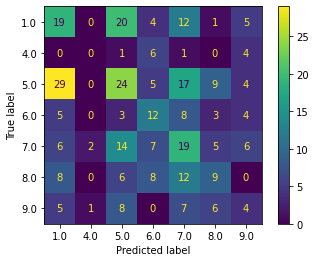

In [203]:
plot_confusion_matrix(neigh, X_test, y_test['label'].values)

### Visualize Errors

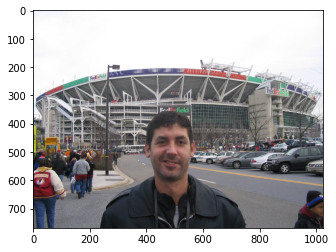

In [198]:
# We often misclassify type 5 as type 1, lets find an example
y_test['pred'] = preds
error_1_5 = y_test.loc[(y_test['label']==5) & (y_test['pred']==1)].copy()
error_1_5.reset_index(inplace=True)

err = plt.imread(image_dir + error_1_5.loc[0, 'img_file'])
plt.imshow(err)

# To-Do: instead of visualizing image, get the bbox
# TO-DO: Find an example of the 5 class so we can see the similarities